In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="colorblind", color_codes=True)

In [4]:
df = pd.read_csv('data/jokes_dataset.csv')

In [43]:
df.body = df.body.astype('str')
df.title = df.title.astype('str')

In [44]:
df['body_length'] = [len(df.body[i].split(' ')) for i in range(df.shape[0])]
df['title_length'] = [len(df.title[i].split(' ')) for i in range(df.shape[0])]

In [45]:
df.describe()

,score,body_length,title_length
count,194553.000000,194553.000000,194553.000000
mean,118.223255,207.076843,44.891983
std,936.231277,573.372194,23.264587
min,0.000000,1.000000,1.000000
25%,0.000000,22.000000,30.000000
50%,3.000000,44.000000,42.000000
75%,16.000000,144.000000,55.000000
max,48526.000000,40189.000000,300.000000


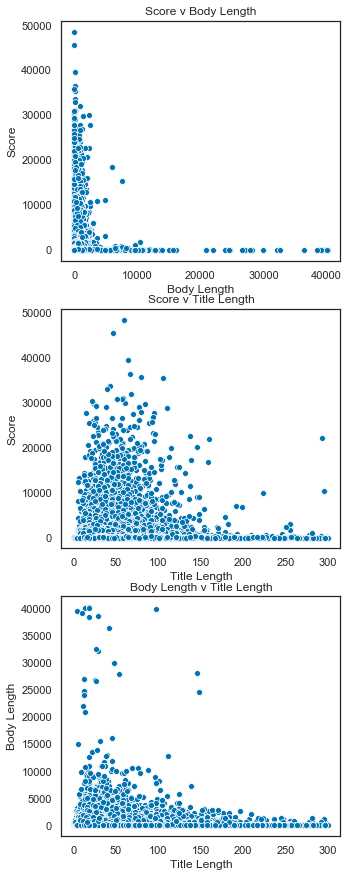

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15))

sns.scatterplot(df.body_length, df.score, ax=ax1)
sns.scatterplot(df.title_length, df.score, ax=ax2)
sns.scatterplot(df.title_length, df.body_length, ax=ax3)

ax1.set_title('Score v Body Length')
ax2.set_title('Score v Title Length')
ax3.set_title('Body Length v Title Length')

ax1.set(xlabel='Body Length', ylabel='Score')
ax2.set(xlabel='Title Length', ylabel='Score')
ax3.set(xlabel='Title Length', ylabel='Body Length')

fig.savefig('plots/scatter_plots.png', dpi=300, bbox_inches='tight')

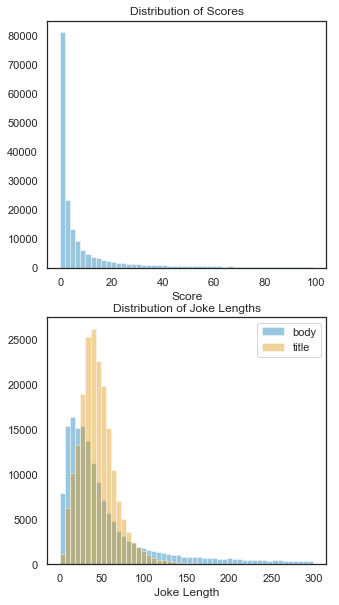

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,10))

sns.distplot(df.score[df.score < 100], kde=False, ax=ax1)
sns.distplot(df.body_length[df.body_length<300], kde=False, label='body', ax=ax2)
sns.distplot(df.title_length, kde=False, label='title', ax=ax2)

ax1.set_title('Distribution of Scores')
ax2.set_title('Distribution of Joke Lengths')
ax1.set(xlabel='Score')
ax2.set(xlabel='Joke Length')
plt.legend()

fig.savefig('plots/histograms.png', dpi=300, bbox_inches='tight')